In [ ]:
#!pip install graphviz
#!pip install pydot
#!pip install pydotplus
try:
# %tensorflow_version only exists in Colab.
  %tensorflow_version 2.9.1
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random
import pydotplus
from keras.utils import plot_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.9.1`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

data = train_images.tolist()
data.extend(test_images.tolist())
len(data)

70000

In [ ]:
labels = np.concatenate((train_labels, test_labels), axis=0)
len(labels)

70000

In [ ]:
# import module
import pandas as pd
df=pd.DataFrame({"images": data,"labels" : labels})
df=df.sort_values(by=['labels'], ascending=True).reset_index()
df.shape

(70000, 3)

In [ ]:
df['labels'].value_counts()

0    7000
1    7000
2    7000
3    7000
4    7000
5    7000
6    7000
7    7000
8    7000
9    7000
Name: labels, dtype: int64

In [ ]:
df.head()

,index,images,labels
0,17720,"[[0, 0, 0, 0, 3, 4, 0, 0, 0, 59, 147, 196, 104...",0
1,42523,"[[0, 0, 0, 0, 0, 0, 0, 0, 6, 93, 199, 66, 0, 0...",0
2,13082,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3,30948,"[[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 15, 35, 47, 41...",0
4,6062,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 102, 70, 38, ...",0


In [ ]:
df["index"]=df.index

In [ ]:
df.head()

,index,images,labels
0,0,"[[0, 0, 0, 0, 3, 4, 0, 0, 0, 59, 147, 196, 104...",0
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 6, 93, 199, 66, 0, 0...",0
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3,3,"[[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 15, 35, 47, 41...",0
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 102, 70, 38, ...",0


In [ ]:
df1=df[df["index"].map(lambda x: x%2==0)].reset_index()
df1

,level_0,index,images,labels
0,0,0,"[[0, 0, 0, 0, 3, 4, 0, 0, 0, 59, 147, 196, 104...",0
1,2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 102, 70, 38, ...",0
3,6,6,"[[0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 81, 112, 0, 0,...",0
4,8,8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 11, 0, ...",0
...,...,...,...,...
34995,69990,69990,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9
34996,69992,69992,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9
34997,69994,69994,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 8, 61, 7...",9
34998,69996,69996,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9


In [ ]:
df1["images1"]=df[df["index"].map(lambda x: x%2!=0)].reset_index()["images"]
df1["labels1"]=df[df["index"].map(lambda x: x%2!=0)].reset_index()["labels"]

In [ ]:
df1.head()

,level_0,index,images,labels,images1,labels1
0,0,0,"[[0, 0, 0, 0, 3, 4, 0, 0, 0, 59, 147, 196, 104...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 6, 93, 199, 66, 0, 0...",0
1,2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,"[[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 15, 35, 47, 41...",0
2,4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 102, 70, 38, ...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3,6,6,"[[0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 81, 112, 0, 0,...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 95, 8, ...",0
4,8,8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 11, 0, ...",0,"[[0, 0, 0, 0, 0, 3, 0, 0, 0, 59, 202, 145, 34,...",0


In [ ]:
df2=df1.drop(["level_0","index","labels1"], axis=1)
df2

,images,labels,images1
0,"[[0, 0, 0, 0, 3, 4, 0, 0, 0, 59, 147, 196, 104...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 6, 93, 199, 66, 0, 0..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,"[[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 15, 35, 47, 41..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 102, 70, 38, ...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 81, 112, 0, 0,...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 95, 8, ..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 11, 0, ...",0,"[[0, 0, 0, 0, 0, 3, 0, 0, 0, 59, 202, 145, 34,..."
...,...,...,...
34995,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
34996,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
34997,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 8, 61, 7...",9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
34998,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
index=df2.iloc[20000:35000].index
index

RangeIndex(start=20000, stop=35000, step=1)

In [ ]:
#df2["images1"]

In [ ]:
images=df2["images1"].iloc[20000:35000].sample(frac=1).reset_index().drop("index",axis=1)
images.index=index
images

,images1
20000,"[[0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 0, 131, 107, 7..."
20001,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20002,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20003,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20004,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 9, 85, 1..."
...,...
34995,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 147, 57, 1..."
34996,"[[0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 86, 219, 16..."
34997,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 20, 215, 19..."
34998,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 66, 140, 145, 94,..."


In [ ]:
df2["images1"].iloc[20000:35000]=images["images1"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df2.iloc[20000:35000]

,images,labels,images1
20000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5,"[[0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 0, 131, 107, 7..."
20001,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20002,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20003,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20004,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 9, 85, 1..."
...,...,...,...
34995,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 147, 57, 1..."
34996,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,"[[0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 86, 219, 16..."
34997,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 8, 61, 7...",9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 20, 215, 19..."
34998,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 66, 140, 145, 94,..."


In [ ]:
df2["y_label"]=float(1)

In [ ]:
df2["y_label"].iloc[20000:35000]=float(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df2.head(5)

,images,labels,images1,y_label
0,"[[0, 0, 0, 0, 3, 4, 0, 0, 0, 59, 147, 196, 104...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 6, 93, 199, 66, 0, 0...",1.0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,"[[0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 15, 35, 47, 41...",1.0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 102, 70, 38, ...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1.0
3,"[[0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 81, 112, 0, 0,...",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 95, 8, ...",1.0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 11, 0, ...",0,"[[0, 0, 0, 0, 0, 3, 0, 0, 0, 59, 202, 145, 34,...",1.0


In [ ]:
df2=df2.sample(frac=1).reset_index(drop=True)

In [ ]:
df2

,images,labels,images1,y_label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1.0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 107, 102, 93, 134...",1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 153, 123, 118...",1.0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 51, 73, ...",6,"[[0, 0, 0, 2, 1, 0, 0, 0, 77, 186, 158, 124, 9...",0.0
3,"[[0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 68, 80, ...",8,"[[0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 175, 182, 1...",0.0
4,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 136, 155...",8,"[[0, 0, 0, 0, 0, 0, 0, 4, 169, 169, 0, 0, 0, 0...",0.0
...,...,...,...,...
34995,"[[0, 0, 0, 0, 0, 0, 0, 0, 20, 77, 14, 24, 14, ...",3,"[[0, 0, 0, 0, 69, 188, 173, 177, 179, 191, 188...",1.0
34996,"[[0, 0, 0, 1, 0, 0, 0, 0, 0, 105, 187, 184, 16...",0,"[[0, 0, 0, 0, 0, 0, 30, 64, 154, 95, 0, 0, 0, ...",1.0
34997,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.0
34998,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1.0


In [ ]:
def initialize_base_network():
    input = Input(shape=(28,28,), name="base_input")
    x = Flatten(name="flatten_input")(input)
    
    x = Dense(128, activation='relu', name="first_base_dense")(x)
    x = Dropout(0.1, name="first_dropout")(x)
    
    x = Dense(128, activation='relu', name="second_base_dense")(x)
    x = Dropout(0.1, name="second_dropout")(x)
    
    x = Dense(128, activation='relu', name="third_base_dense")(x)

    return Model(inputs=input, outputs=x)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    print(shape1[0])
    return (shape1[0], 1)

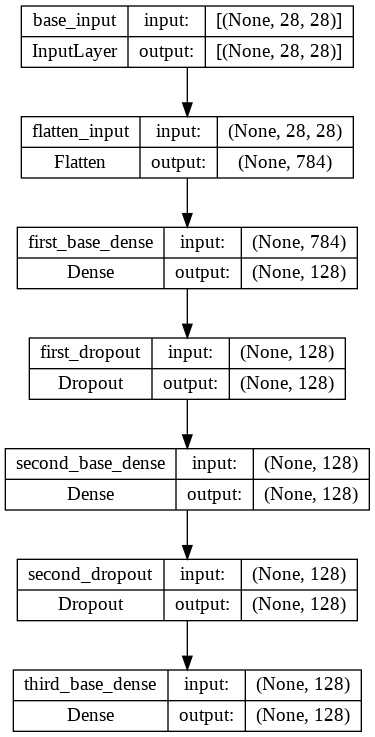

In [ ]:

base_network = initialize_base_network()
plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='base-model.png')

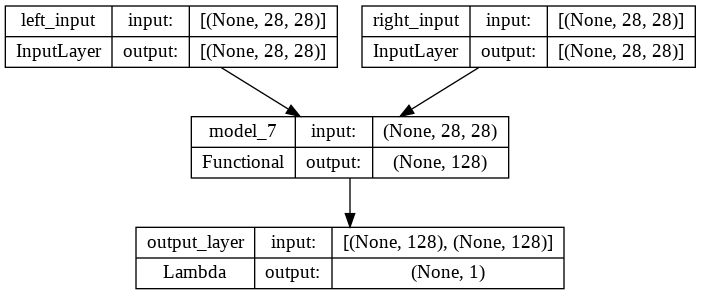

In [ ]:
# create the left input and point to the base network
input_a = Input(shape=(28,28,), name="left_input")
vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(28,28,), name="right_input")
vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], output)

# plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [ ]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [ ]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(df2, test_size=0.2)

In [ ]:
rms = RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = model.fit([np.array(train["images"].tolist()),
                     np.array(train["images1"].tolist())],
                    np.array(train["y_label"]), 
                    epochs=20, 
                    batch_size=128, 
                    validation_data=([np.array(test["images"].tolist()),
                                      np.array(test["images1"].tolist())], 
                                      np.array(test["y_label"])))

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 954.3049 - val_loss: 0.4035
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.2979 - val_loss: 0.2452
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.2277 - val_loss: 0.2392
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.2039 - val_loss: 0.3482
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.1826 - val_loss: 0.1939
Epoch 6/20
219/219 [==============================] - 3s 13ms/step - loss: 0.1593 - val_loss: 0.2065
Epoch 7/20
219/219 [==============================] - 3s 12ms/step - loss: 0.1701 - val_loss: 0.2414
Epoch 8/20
219/219 [==============================] - 3s 13ms/step - loss: 0.1501 - val_loss: 0.1220
Epoch 9/20
219/219 [==============================] - 3s 12ms/step - loss: 0.1398 - val_loss: 0.1776
Epoch 10/20
219/219 [==============================] - 3s 13ms/step - loss: 0.1366 - val_

In [ ]:
loss = model.evaluate(
    x=[
        np.array(train["images"].tolist()),
        np.array(train["images1"].tolist())
    ], 
    y=np.array(train["y_label"]))

875/875 [==============================] - 5s 6ms/step - loss: 0.1080


In [ ]:
y_pred_train = model.predict([
                              np.array(test["images"].tolist()),
                              np.array(test["images1"].tolist())
                             ]
                            )

219/219 [==============================] - 1s 4ms/step


In [ ]:
y_pred_test = model.predict([np.array(train["images"].tolist()),np.array(train["images1"].tolist())])

875/875 [==============================] - 6s 7ms/step


In [ ]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [ ]:
y_pred_test]

array([[3.1622776e-04],
       [3.1622776e-04],
       [1.2012719e+00],
       ...,
       [3.1622776e-04],
       [3.1622776e-04],
       [3.1622776e-04]], dtype=float32)

In [ ]:

train_accuracy = compute_accuracy(np.array(train["y_label"]), y_pred_train)

test_accuracy = compute_accuracy(np.array(test["y_label"]), y_pred_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


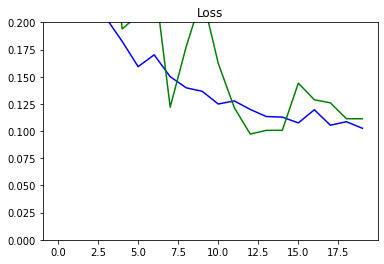

In [ ]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


plot_metrics(metric_name='loss', title="Loss", ylim=0.2)

In [ ]:
# Matplotlib config
def visualize_images():
    plt.rc('image', cmap='gray_r')
    plt.rc('grid', linewidth=0)
    plt.rc('xtick', top=False, bottom=False, labelsize='large')
    plt.rc('ytick', left=False, right=False, labelsize='large')
    plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
    plt.rc('text', color='a8151a')
    plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts


# utility to display a row of digits with their predictions
def display_images(left, right, predictions, labels, title, n):
    plt.figure(figsize=(17,3))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.grid(None)
    left = np.reshape(left, [n, 28, 28])
    left = np.swapaxes(left, 0, 1)
    left = np.reshape(left, [28, 28*n])
    plt.imshow(left)
    plt.figure(figsize=(17,3))
    plt.yticks([])
    plt.xticks([28*x+14 for x in range(n)], predictions)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if predictions[i] > 0.5: t.set_color('red') # bad predictions in red
    plt.grid(None)
    right = np.reshape(right, [n, 28, 28])
    right = np.swapaxes(right, 0, 1)
    right = np.reshape(right, [28, 28*n])
    plt.imshow(right)

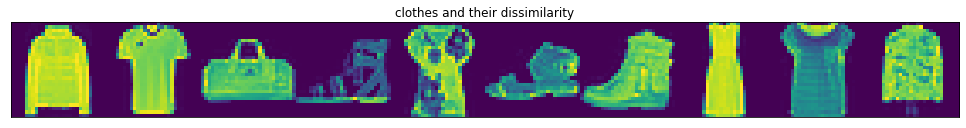

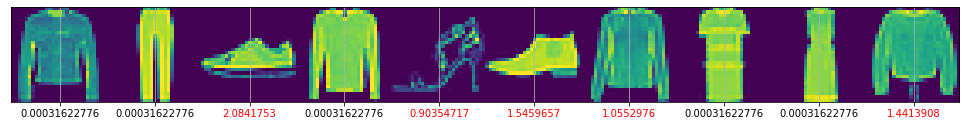

In [ ]:
y_pred_train = np.squeeze(y_pred_train)
indexes = np.random.choice(len(y_pred_train), size=10)
display_images(np.array(train["images"].tolist())[indexes], np.array(test["images"].tolist())[indexes], y_pred_train[indexes], np.array(train["y_label"])[indexes], "clothes and their dissimilarity", 10)
